In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [6]:
d = np.genfromtxt('chain_1.dat')
logL = d[:,0]
x = d[:,1]

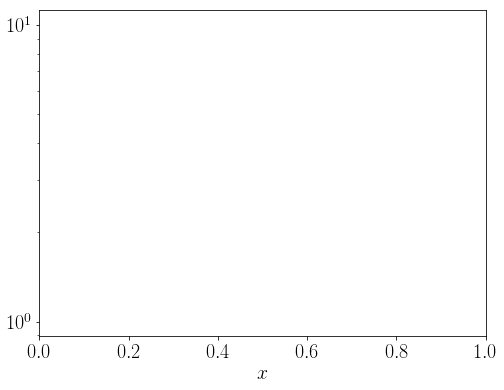

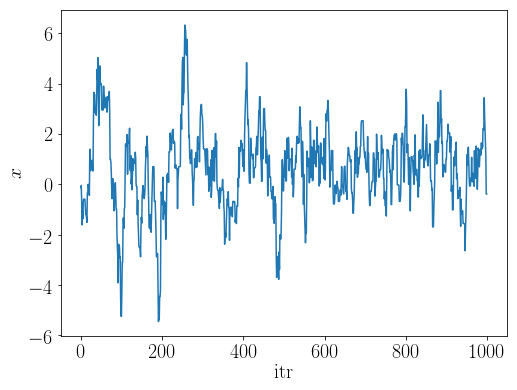

In [7]:
plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'itr', fontsize=20)
plt.ylabel(r'$x$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(x)

plt.show()

26


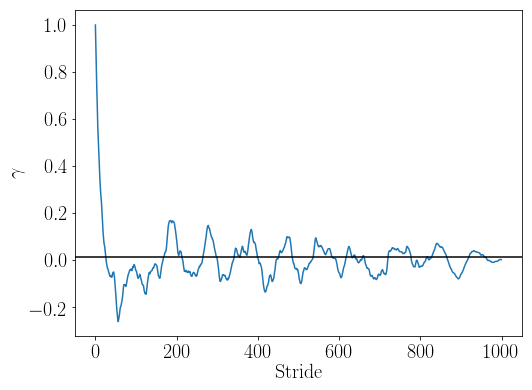

In [8]:
plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Stride', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

temp = x-np.mean(x)
corr = np.correlate(temp, temp, mode='full')

c = corr[np.int(len(x))-1:]/np.max(corr)

plt.plot(c)
plt.axhline(y=0.01,color='k')

corr_len = np.where(c < 0.01)[0][0]
print corr_len

plt.show()

In [9]:
mu = 1.
nu = 3.
sigma = 1.

def logL(x):
    result  = -0.5*(np.log(np.pi) + np.log(nu)) - np.log(sigma) - np.log(sp.gamma(0.5*nu)) 
    result += np.log(sp.gamma(0.5*(1. + nu))) - 0.5*(1. + nu)*np.log(1 + (x - mu)**2/(nu*sigma**2))
    
    return result

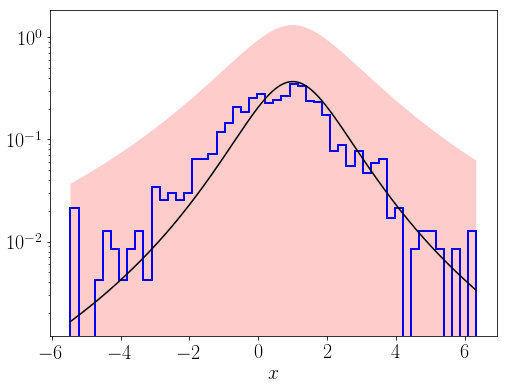

In [10]:
plt.figure(figsize=(8,6))   
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$x$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.yscale('log')
bins = plt.hist(x, bins=50, histtype='step', normed=True, lw=2, color='b')

xx = np.linspace(np.min(x), np.max(x), 1000)
yy = logL(xx)
plt.plot(xx, np.exp(yy), 'k')

delta = abs(bins[1][1] - bins[1][0])
uncer = 1./np.sqrt(len(x)/corr_len*delta*np.exp(logL(yy)))
n_sigma = 2.

upper = np.exp(yy)*(1. + n_sigma*uncer)
lower = np.exp(yy)*(1. - n_sigma*uncer)

plt.fill_between(xx, lower, upper, alpha=0.2, facecolor='red')

# plt.xlim(-12., 12.)
# plt.ylim(1.0e-3, 0.9)
plt.show()

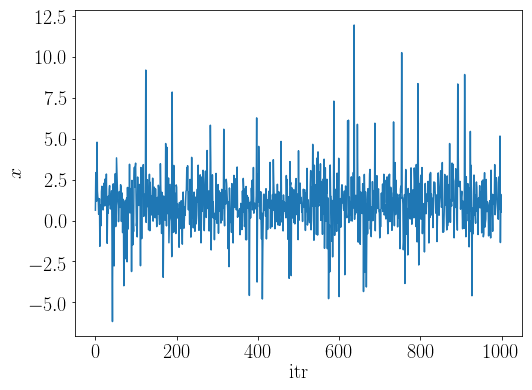

1


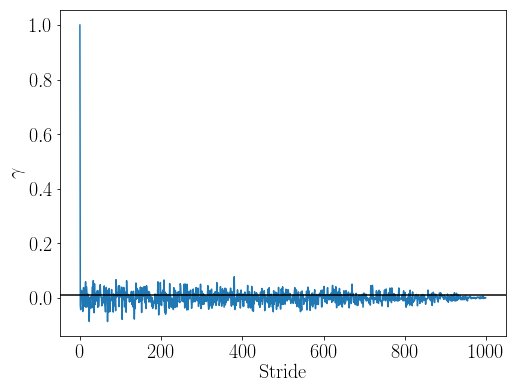

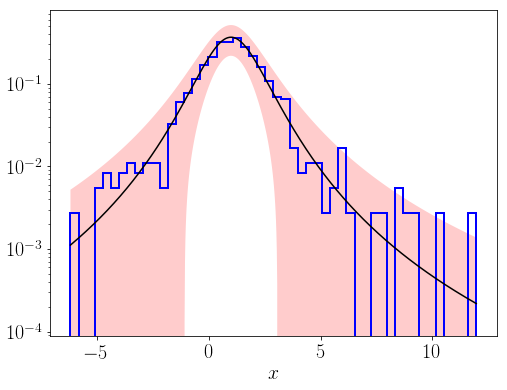

In [11]:
samples = np.genfromtxt('samples.dat')
x = samples

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'itr', fontsize=20)
plt.ylabel(r'$x$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(x)

plt.show()

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Stride', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

temp = x-np.mean(x)
corr = np.correlate(temp, temp, mode='full')

c = corr[np.int(len(x))-1:]/np.max(corr)

plt.plot(c)
plt.axhline(y=0.01,color='k')

corr_len = np.where(c < 0.01)[0][0]
print corr_len

plt.show()

plt.figure(figsize=(8,6))   
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$x$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.yscale('log')
bins = plt.hist(x, bins=50, histtype='step', normed=True, lw=2, color='b')

xx = np.linspace(np.min(x), np.max(x), 1000)
yy = logL(xx)
plt.plot(xx, np.exp(yy), 'k')

delta = abs(bins[1][1] - bins[1][0])
uncer = 1./np.sqrt(len(x)/corr_len*delta*np.exp(logL(yy)))
n_sigma = 2.

upper = np.exp(yy)*(1. + n_sigma*uncer)
lower = np.exp(yy)*(1. - n_sigma*uncer)

plt.fill_between(xx, lower, upper, alpha=0.2, facecolor='red')

# plt.xlim(-12., 12.)
# plt.ylim(1.0e-3, 0.9)
plt.show()

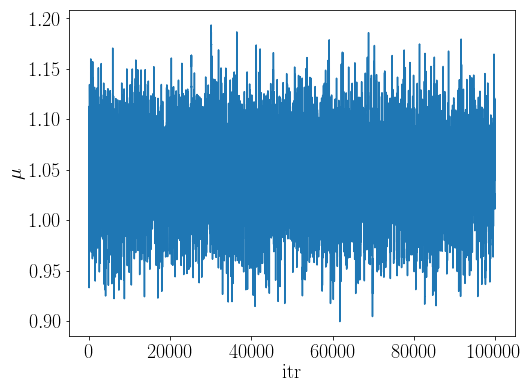

101


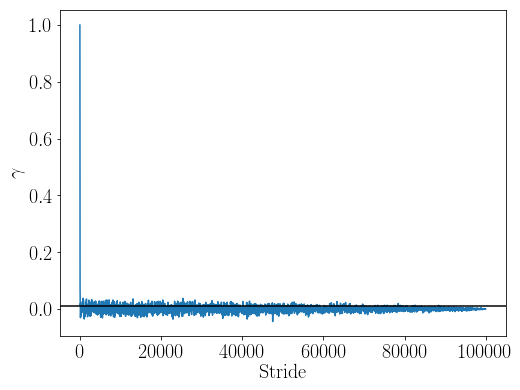

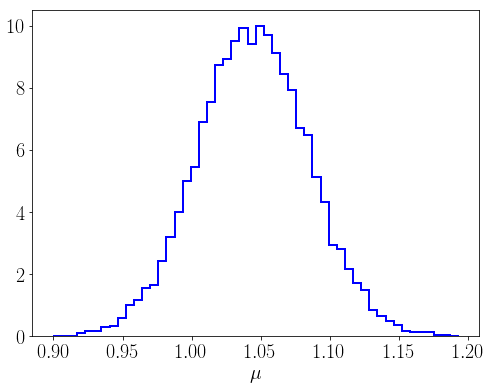

In [12]:
samples = np.genfromtxt('chain1.dat')
x = samples[:,1]

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'itr', fontsize=20)
plt.ylabel(r'$\mu$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(x)

plt.show()

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Stride', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

temp = x-np.mean(x)
corr = np.correlate(temp, temp, mode='full')

c = corr[np.int(len(x))-1:]/np.max(corr)

plt.plot(c)
plt.axhline(y=0.01,color='k')

corr_len = np.where(c < 0.01)[0][0]
print corr_len

plt.show()

plt.figure(figsize=(8,6))   
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$\mu$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.hist(x, bins=50, histtype='step', normed=True, lw=2, color='b')

plt.show()

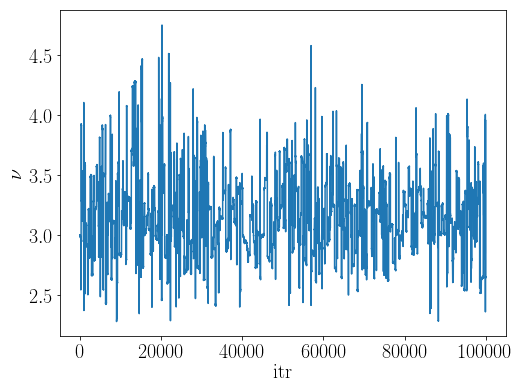

771


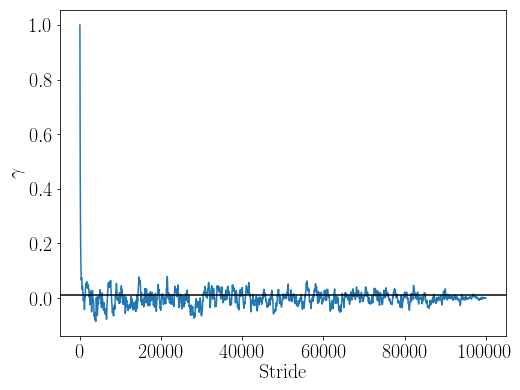

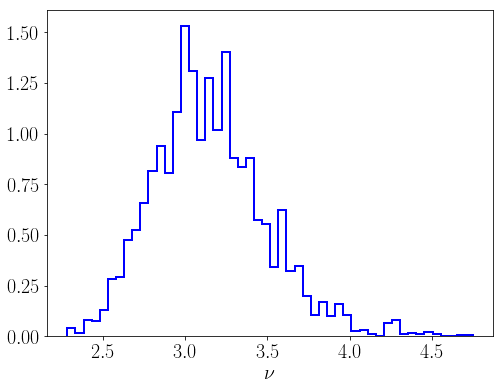

In [13]:
#samples = np.genfromtxt('chain1.dat')
x = samples[:,2]

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'itr', fontsize=20)
plt.ylabel(r'$\nu$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(x)

plt.show()

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Stride', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

temp = x-np.mean(x)
corr = np.correlate(temp, temp, mode='full')

c = corr[np.int(len(x))-1:]/np.max(corr)

plt.plot(c)
plt.axhline(y=0.01,color='k')

corr_len = np.where(c < 0.01)[0][0]
print corr_len

plt.show()

plt.figure(figsize=(8,6))   
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$\nu$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.hist(x, bins=50, histtype='step', normed=True, lw=2, color='b')

plt.show()

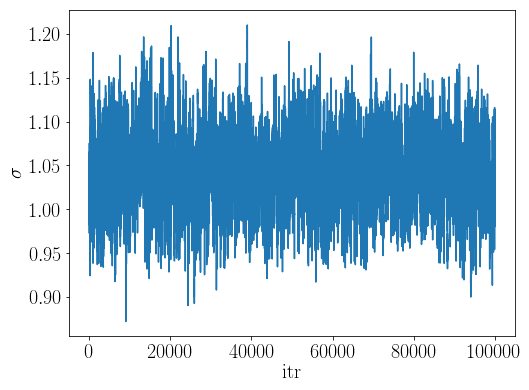

368


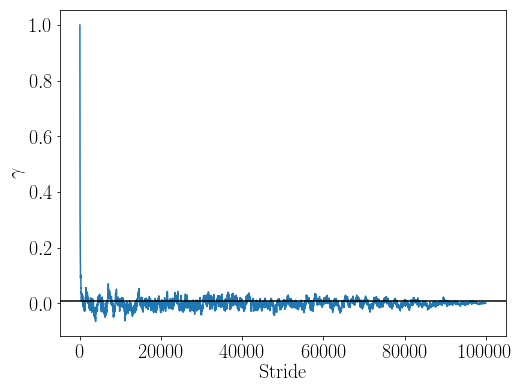

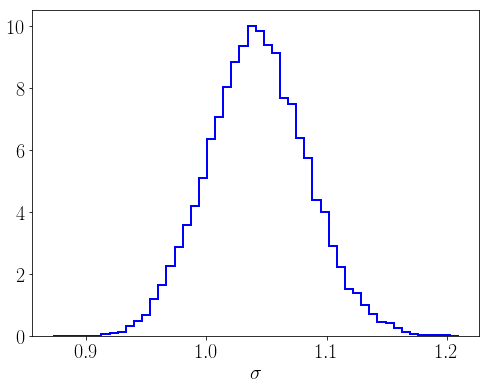

In [14]:
#samples = np.genfromtxt('chain1.dat')
x = samples[:,3]

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'itr', fontsize=20)
plt.ylabel(r'$\sigma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(x)

plt.show()

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Stride', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

temp = x-np.mean(x)
corr = np.correlate(temp, temp, mode='full')

c = corr[np.int(len(x))-1:]/np.max(corr)

plt.plot(c)
plt.axhline(y=0.01,color='k')

corr_len = np.where(c < 0.01)[0][0]
print corr_len

plt.show()

plt.figure(figsize=(8,6))   
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$\sigma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.hist(x, bins=50, histtype='step', normed=True, lw=2, color='b')

plt.show()

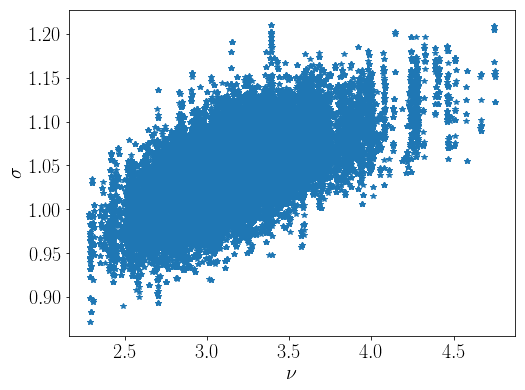

In [15]:
samples = np.genfromtxt('chain1.dat')
nu  = samples[:,2]
sig = samples[:,3]

plt.figure(figsize=(8,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'\nu', fontsize=20)
plt.ylabel(r'$\sigma$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.plot(nu, sig, '*')
plt.show()